In [2]:
import math
import torch
import gpytorch
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from GPyEm import GPE_ensemble as GPE

import os
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split


seed = 7
#set_seed(seed)

In [3]:
mesh = 46

In [4]:
x_labels=pd.read_csv(r'/Users/pmzcwl/Library/CloudStorage/OneDrive-TheUniversityofNottingham/shared_simulations/mechanics/scenario_12/xlabels.txt',delim_whitespace=True,header=None)



In [5]:

X_all = pd.read_csv(r'/Users/pmzcwl/Library/CloudStorage/OneDrive-TheUniversityofNottingham/shared_simulations/mechanics/scenario_'+str(mesh)+'/X.txt',index_col=None,delim_whitespace=True,header=None)
# X_all.columns=x_labels.values.squeeze().tolist()
print(X_all)

           0         1         2         3        4        5         6  \
0    2.77049   5.32910   9.17043   7.23675  5.21731  32.2885  11.74730   
1    3.61746  12.72040  12.80220   8.35094  2.05551  39.2948  10.69220   
2    2.38790   7.65312  14.38840  10.16880  4.06018  28.3848  17.31130   
3    3.76219  21.59860  11.81960   3.56951  2.52663  18.8133  10.60980   
4    0.83687  10.96490   2.71685   3.73192  3.98974  30.5635   5.18740   
..       ...       ...       ...       ...      ...      ...       ...   
195  1.57167  20.55250   4.34630   4.02029  4.08107  32.4084  16.89020   
196  3.87212  31.39530   3.95767   9.41722  3.54334  16.8671  10.51070   
197  1.90693  19.14840   7.64500   4.70468  2.66861  22.9449  19.89110   
198  2.88270  17.37540  14.74540  10.00510  4.58641  27.4414   8.65209   
199  1.07599   4.21971   8.84592   3.88759  2.23291  12.5012  19.51450   

            7         8        9  
0    11.25900  0.013097  1.43362  
1    11.99220  0.004829  1.53001  
2    1

In [6]:
mask = pd.read_csv(r'/Users/pmzcwl/Library/CloudStorage/OneDrive-TheUniversityofNottingham/shared_simulations/mechanics/scenario_'+str(mesh)+'/output_mask.txt',index_col=None,delim_whitespace=True,header=None)

In [7]:
np.sum(mask)

0    77
dtype: int64

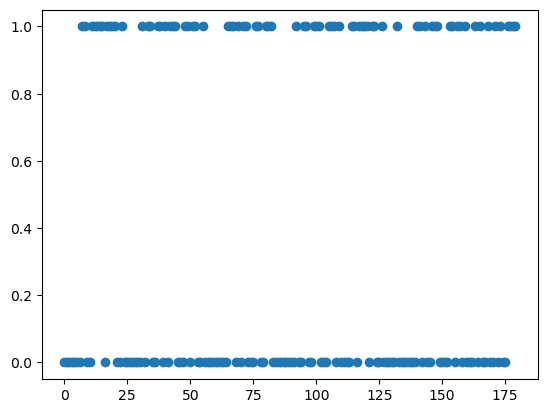

In [8]:
plt.plot(mask,'o')

In [9]:
y_labels=pd.read_csv(r'/Users/pmzcwl/Library/CloudStorage/OneDrive-TheUniversityofNottingham/shared_simulations/mechanics/scenario_12/ylabels.txt',delim_whitespace=True,header=None)


y_all = pd.read_csv(r'/Users/pmzcwl/Library/CloudStorage/OneDrive-TheUniversityofNottingham/shared_simulations/mechanics/scenario_'+str(mesh)+'/Y.txt',index_col=None,delim_whitespace=True,header=None)
y_all.columns=y_labels.values.squeeze().tolist()
print(y_all)

     $V^{\mathrm{max}}_{\mathrm{LV}}$  $V^{\mathrm{max}}_{\mathrm{RV}}$  \
0                               0.000                             0.000   
1                               0.000                             0.000   
2                               0.000                             0.000   
3                               0.000                             0.000   
4                               0.000                             0.000   
..                                ...                               ...   
175                             0.000                             0.000   
176                           131.914                           108.649   
177                           141.890                           112.490   
178                           137.761                           111.674   
179                           126.926                           108.653   

     $V^{\mathrm{max}}_{\mathrm{LA}}$  $V^{\mathrm{max}}_{\mathrm{RA}}$  \
0                       

In [10]:
input_masked = X_all.copy()

In [11]:
input_masked = X_all.copy().iloc[0:mask.shape[0]]
input_masked=input_masked.iloc[np.array(mask==1),]
y_all=y_all.iloc[np.array(mask==1),]
input_masked.index = y_all.index

In [15]:
y_train = torch.tensor(y_all.values)
x_train = torch.tensor(input_masked.values)

In [16]:
emulator = GPE.ensemble(x_train,y_train,mean_func="linear",training_iter=500)

0
1
2
3
4
5
6
7
8
9


In [17]:
nDim = input_masked.shape[1]
boundsMaxMin = []
for i in range(nDim):
    boundsMaxMin.append([np.min(input_masked.iloc[:,i]),np.max(input_masked.iloc[:,i])])
    print(boundsMaxMin[i])

[1.38606, 4.98092]
[2.00623, 31.6315]
[1.06893, 15.9664]
[1.32671, 11.908]
[1.54348, 5.99704]
[10.4491, 39.6406]
[5.23618, 19.5829]
[3.92921, 14.9855]
[0.000669586, 0.0493235]
[1.00128, 1.97786]


In [18]:
x_labels=[1,2,3,4,5,6,7,8,9,10]

In [19]:
##### from SALib.sample import saltelli
from SALib.sample import saltelli
from SALib.analyze import sobol
from SALib.test_functions import Ishigami
import numpy as np

# Define the model inputs
problem = {
    'num_vars': nDim,
    'names': x_labels,
    'bounds': boundsMaxMin
    #'bounds': [[-1, 1],
     #          [-1, 1],
      #         [-1, 1],
       #        [-1, 1],
        #       [-1, 1],
         #      [-1, 1],
          #     [-1, 1],
           #    [-1, 1],
            #   [-1,1]]
}

# Generate samples
param_values = saltelli.sample(problem, 1024)

data1 = torch.tensor(param_values)
#data1.columns = X_train.columns

Ymean=emulator.predict(data1)

/var/folders/_j/ptyc01811q5b1dg30hshtfzh0000gr/T/ipykernel_24101/2553582652.py:24: DeprecationWarning: `salib.sample.saltelli` will be removed in SALib 1.5. Please use `salib.sample.sobol`
  param_values = saltelli.sample(problem, 1024)


In [20]:
Si = []
nMod = y_all.shape[1]
nDim = input_masked.shape[1]
for i in range(nMod):
    Si.append(sobol.analyze(problem, Ymean[:,i].detach().numpy(), print_to_console=True,calc_second_order=True))

          ST   ST_conf
1   0.384357  0.042369
2   0.215292  0.025197
3   0.028952  0.003139
4   0.371255  0.043516
5   0.000230  0.000034
6   0.000032  0.000004
7   0.000524  0.000057
8   0.000142  0.000021
9   0.075626  0.008528
10  0.001078  0.000143
          S1   S1_conf
1   0.355648  0.049639
2   0.172188  0.040946
3   0.024411  0.014318
4   0.315609  0.047560
5   0.000169  0.001245
6   0.000050  0.000450
7   0.001480  0.002008
8   0.000738  0.001057
9   0.065827  0.024995
10  0.000928  0.002800
               S2   S2_conf
(1, 2)   0.004474  0.088298
(1, 3)   0.002298  0.072822
(1, 4)   0.010722  0.084943
(1, 5)   0.000257  0.072287
(1, 6)   0.000259  0.072346
(1, 7)   0.000451  0.072357
(1, 8)   0.000309  0.072261
(1, 9)   0.001049  0.078202
(1, 10) -0.000039  0.072378
(2, 3)  -0.001623  0.066065
(2, 4)   0.032289  0.069591
(2, 5)   0.000589  0.067114
(2, 6)   0.000604  0.067115
(2, 7)  -0.000421  0.067475
(2, 8)   0.000122  0.067346
(2, 9)   0.005073  0.068898
(2, 10)  0.000326 

          ST   ST_conf
1   0.002472  0.000331
2   0.000494  0.000079
3   0.001083  0.000149
4   0.011451  0.001326
5   0.492631  0.060652
6   0.292022  0.032826
7   0.001837  0.000255
8   0.052933  0.006122
9   0.187389  0.018463
10  0.002701  0.000535
          S1   S1_conf
1   0.002676  0.004621
2  -0.000433  0.001845
3   0.000969  0.002749
4   0.009636  0.009429
5   0.463342  0.060746
6   0.267684  0.048816
7   0.001243  0.003856
8   0.044538  0.020400
9   0.165828  0.051908
10  0.000098  0.004565
               S2   S2_conf
(1, 2)  -0.000424  0.005493
(1, 3)  -0.000469  0.005518
(1, 4)  -0.000437  0.005698
(1, 5)   0.000308  0.007408
(1, 6)  -0.000214  0.006225
(1, 7)  -0.000366  0.005490
(1, 8)  -0.001040  0.005800
(1, 9)  -0.000969  0.006180
(1, 10) -0.000504  0.005475
(2, 3)   0.000865  0.002493
(2, 4)   0.000894  0.002500
(2, 5)   0.000837  0.003087
(2, 6)   0.000294  0.002744
(2, 7)   0.000848  0.002475
(2, 8)   0.000801  0.002429
(2, 9)   0.001099  0.002714
(2, 10)  0.000808 

In [21]:
Si_first=np.zeros((nDim,nMod))
Si_total=np.zeros((nDim,nMod))
for i in range(nMod):
    total_Si, first_Si, second_Si = Si[i].to_df()
    Si_first[:,i] =  first_Si.iloc[:,0]
    Si_total[:,i] =  total_Si.iloc[:,0]


In [22]:
# x_labels.values.squeeze().tolist()

In [23]:
y_all.columns.tolist()

['$V^{\\mathrm{max}}_{\\mathrm{LV}}$',
 '$V^{\\mathrm{max}}_{\\mathrm{RV}}$',
 '$V^{\\mathrm{max}}_{\\mathrm{LA}}$',
 '$V^{\\mathrm{max}}_{\\mathrm{RA}}$',
 '$\\overline{E_{ff,\\mathrm{LV}}}$',
 '$\\overline{E_{ff,\\mathrm{RV}}}$',
 '$\\overline{E_{ff,\\mathrm{LA}}}$',
 '$\\overline{E_{ff,\\mathrm{RA}}}$',
 '$\\overline{E_{ff,\\mathrm{V}}}$',
 '$\\overline{E_{ff,\\mathrm{A}}}$']

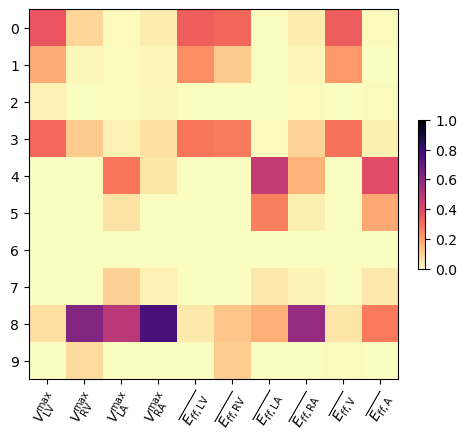

In [24]:
inputs = X_all.columns.tolist()
outputs = y_all.columns.tolist()
fig, ax = plt.subplots()
im = ax.imshow(Si_first[0:28],cmap='magma_r',vmin=0,vmax=1)

ax.set_xticks(np.arange(len(outputs)),labels=outputs)
ax.set_yticks(np.arange(len(inputs)), labels=inputs)
plt.setp(ax.get_xticklabels(), rotation=60, ha="right",
         rotation_mode="anchor");

plt.colorbar(im,fraction=0.015, pad=0.04)

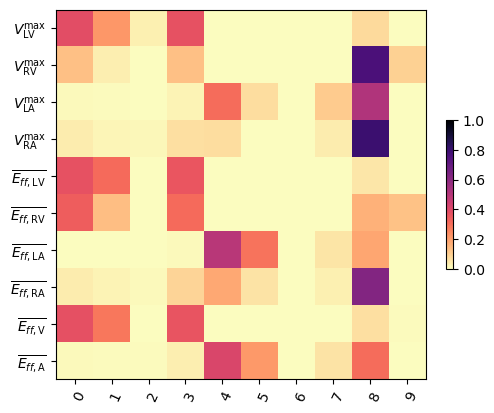

In [25]:
inputs = X_all.columns.tolist()
outputs = y_all.columns.tolist()
fig, ax = plt.subplots()
im = ax.imshow(Si_total.T[0:28],cmap='magma_r',vmin=0,vmax=1)

ax.set_yticks(np.arange(len(outputs)),labels=outputs)
ax.set_xticks(np.arange(len(inputs)), labels=inputs)
plt.setp(ax.get_xticklabels(), rotation=65, ha="right",
         rotation_mode="anchor");

plt.colorbar(im,fraction=0.015, pad=0.04)

In [ ]:
np.savetxt("Si_total_mech_"+str(mesh)+".csv", Si_total, delimiter=",")
np.savetxt("Si_first_mech_"+str(mesh)+".csv", Si_first, delimiter=",")